<div style="background: linear-gradient(45deg, #007BFF, #00BFFF); color: #ffffff; padding: 20px; text-align: center; font-family: 'Verdana', sans-serif; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.3);">
    <h1 style="font-size: 48px; font-weight: bold; margin: 0; text-transform: uppercase;">🩺 Diabetes Prediction 📊</h1>
</div>


<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">📚 Importing Libraries 📦</h2>
</div>


In [1]:
# Data wrangling
import pandas as pd
# Computational operations
import numpy as np  

# For ploting graph / Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing, Model, Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter("ignore")

<br>

<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">🔍 Loading & Basic Exploration 🔎</h2>
</div>


In [2]:
# Read the csv file
diab = pd.read_csv(r"C:\Users\Mohid\Desktop\technohack task\diabetes.csv")

In [3]:
# Display the first few rows of the DataFrame for initial data exploration
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Get the dimensions of the DataFrame (rows, columns)
diab.shape

(768, 9)

In [5]:
# Get a summary of the DataFrame's information including data types, non-null counts, and memory usage
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Count the number of duplicate rows in the DataFrame
diab.duplicated().sum()

0

In [7]:
# Generate summary statistics for the 'diab' DataFrame
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It's worth noting that in medical data, values for attributes like Glucose, BloodPressure, SkinThickness, Insulin, and BMI are typically non-zero in healthy individuals. Values close to 0 may indicate missing or erroneous data rather than normal physiological measurements.

<br>

<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">📊 EDA (Exploratory Data Analysis) 📈</h2>
</div>


<div style="background: #FFA500; color: #ffffff; padding: 5px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> Analyzing Column Distributions</h4>
</div>


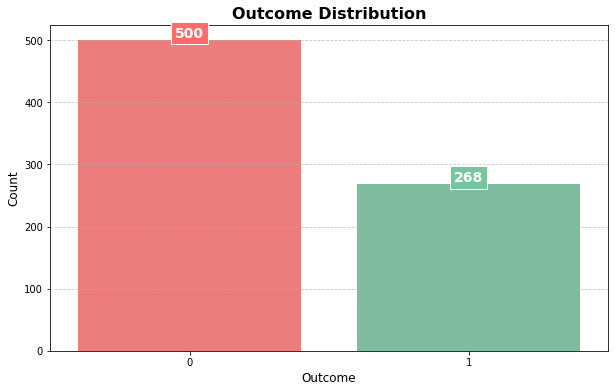

In [8]:
outcome_count = diab['Outcome'].value_counts()

bar_colors = ['#FF6B6B', '#74C69D']  
text_box_colors = ['white', 'white']  
plt.figure(figsize=(10, 6))
sns.barplot(x=outcome_count.index, y=outcome_count.values, palette=bar_colors)
plt.title('Outcome Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, count in enumerate(outcome_count):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=14, fontweight='bold', color='white', bbox=dict(facecolor=bar_colors[i], edgecolor=text_box_colors[i], boxstyle='square'))

plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [9]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 7)
plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
palette = sns.color_palette("Set1")

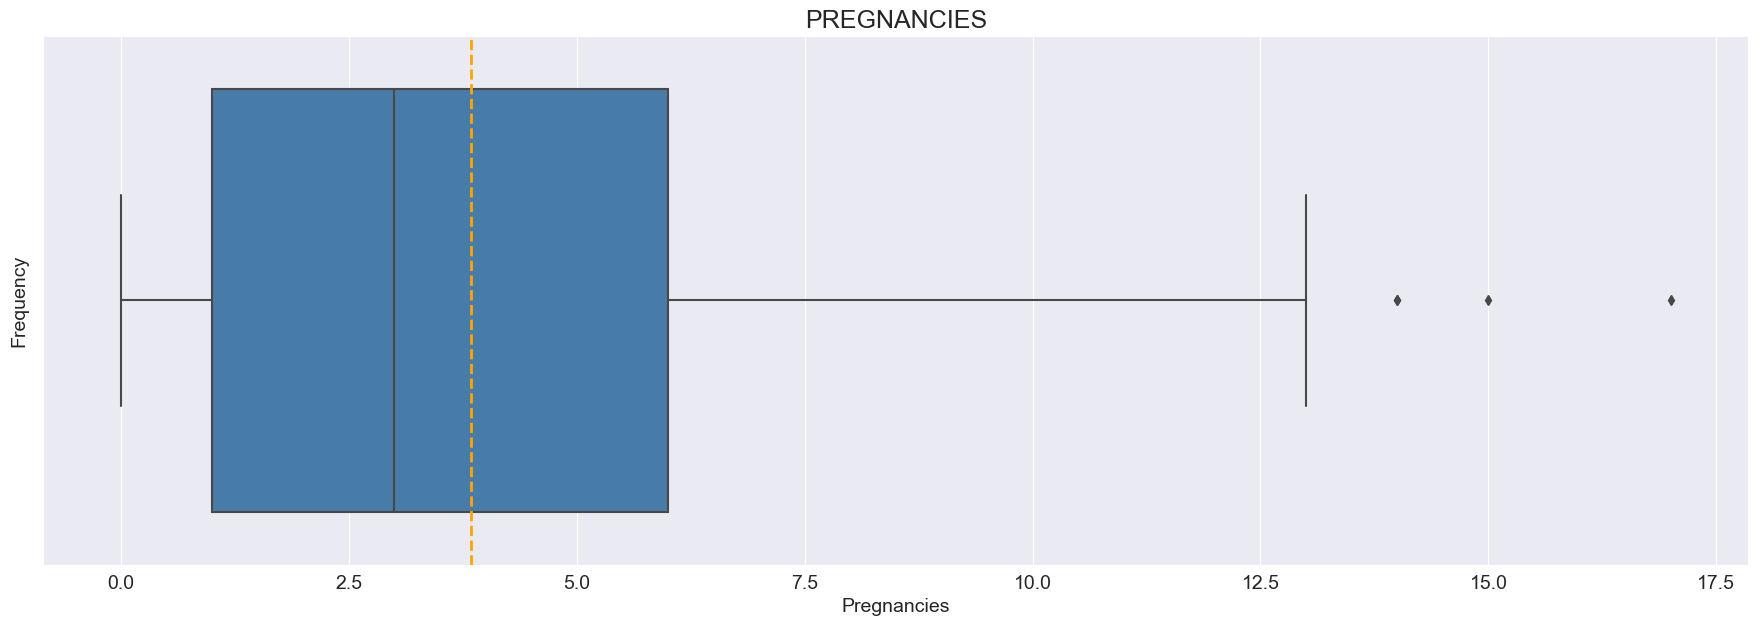

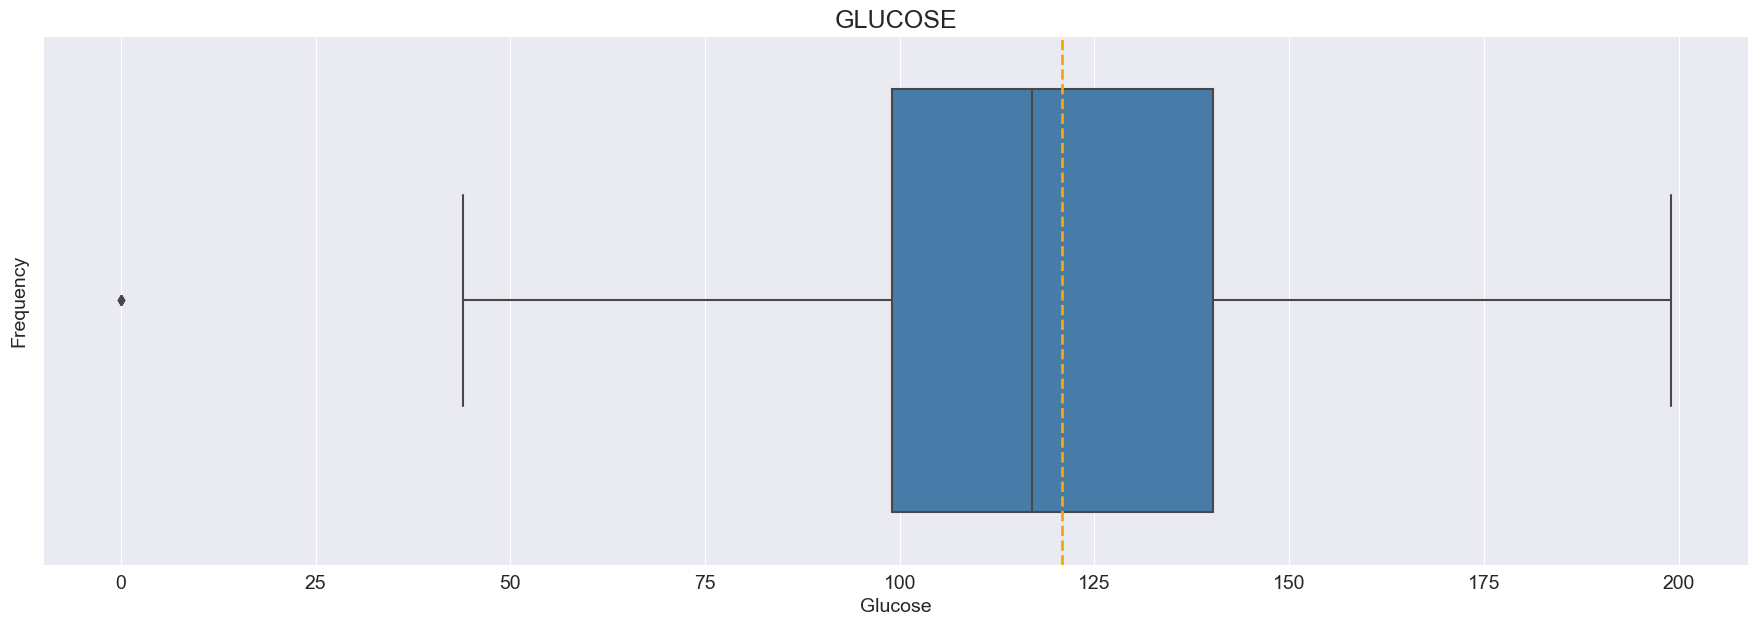

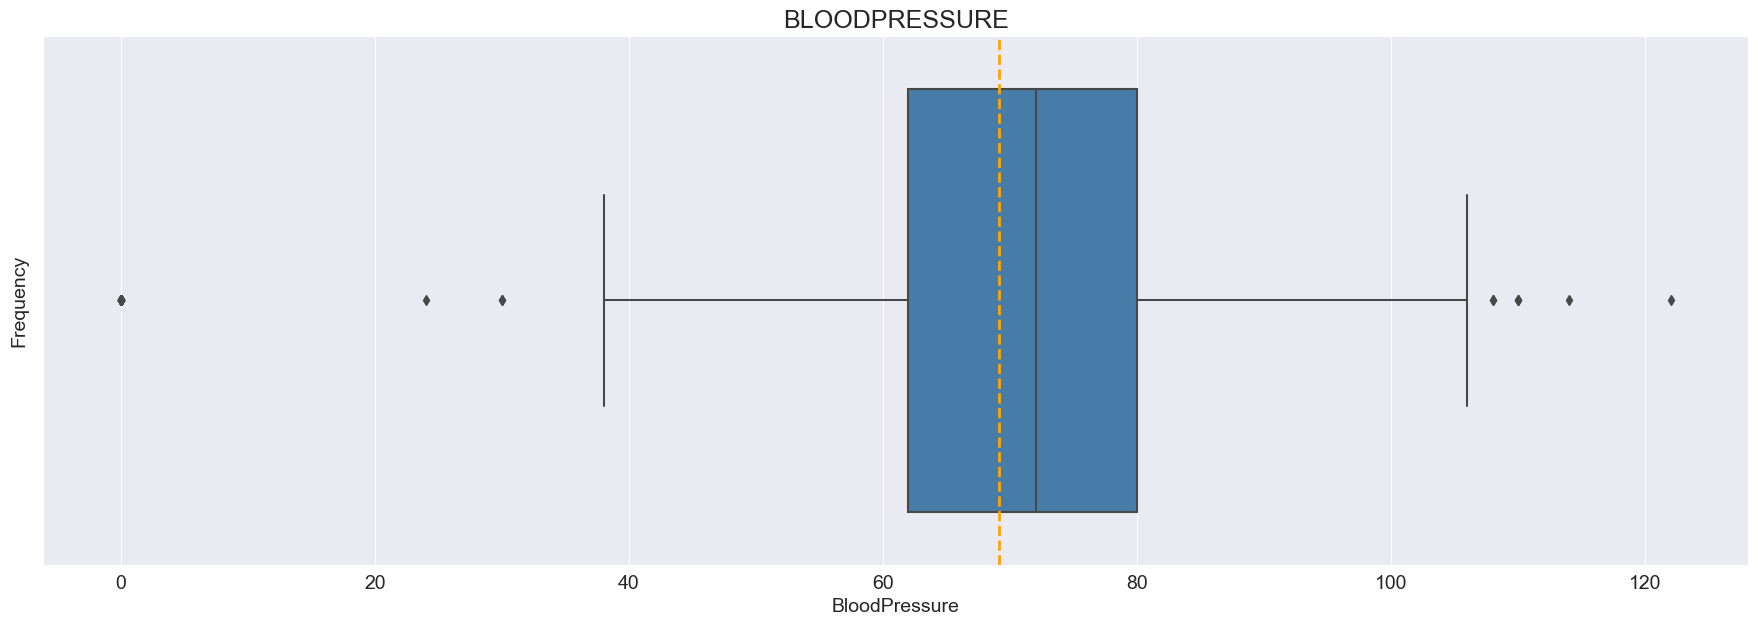

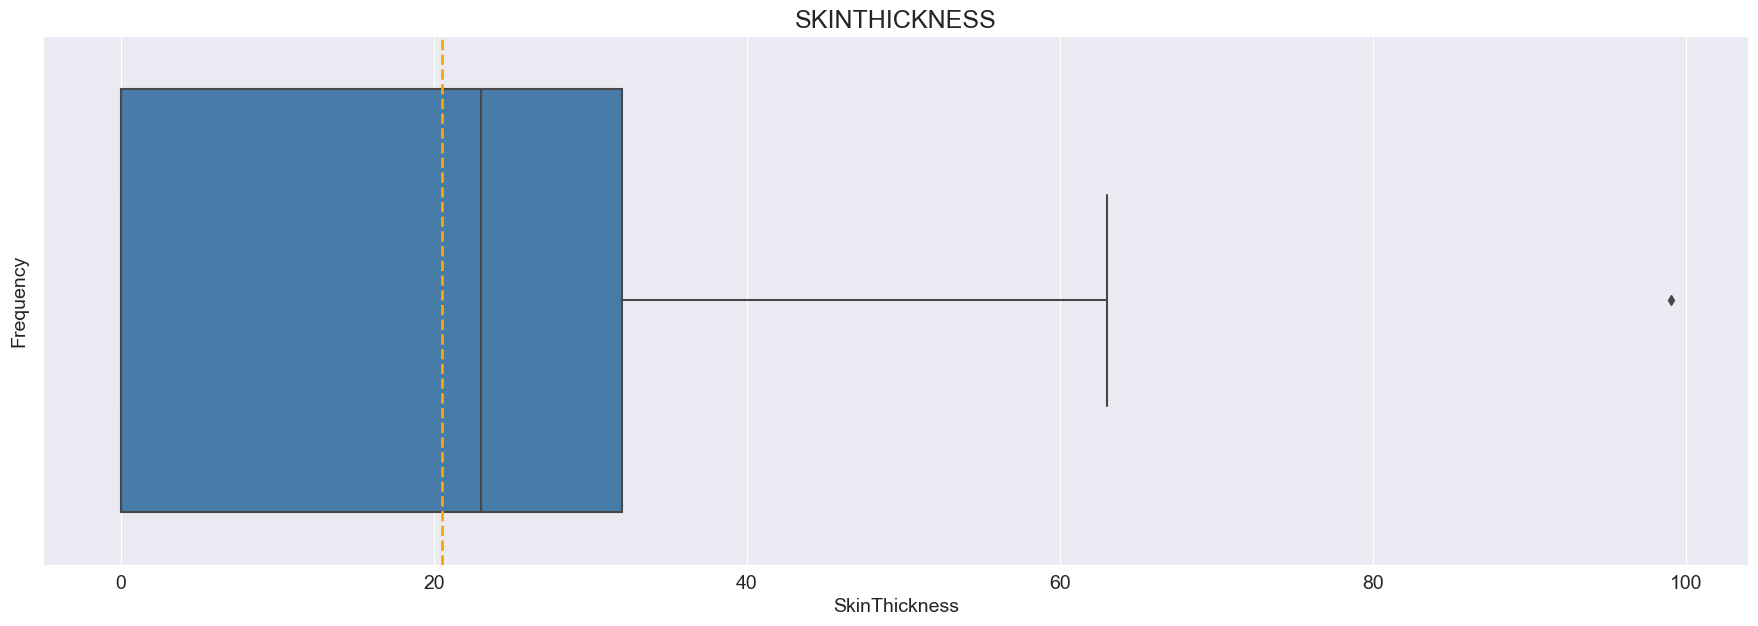

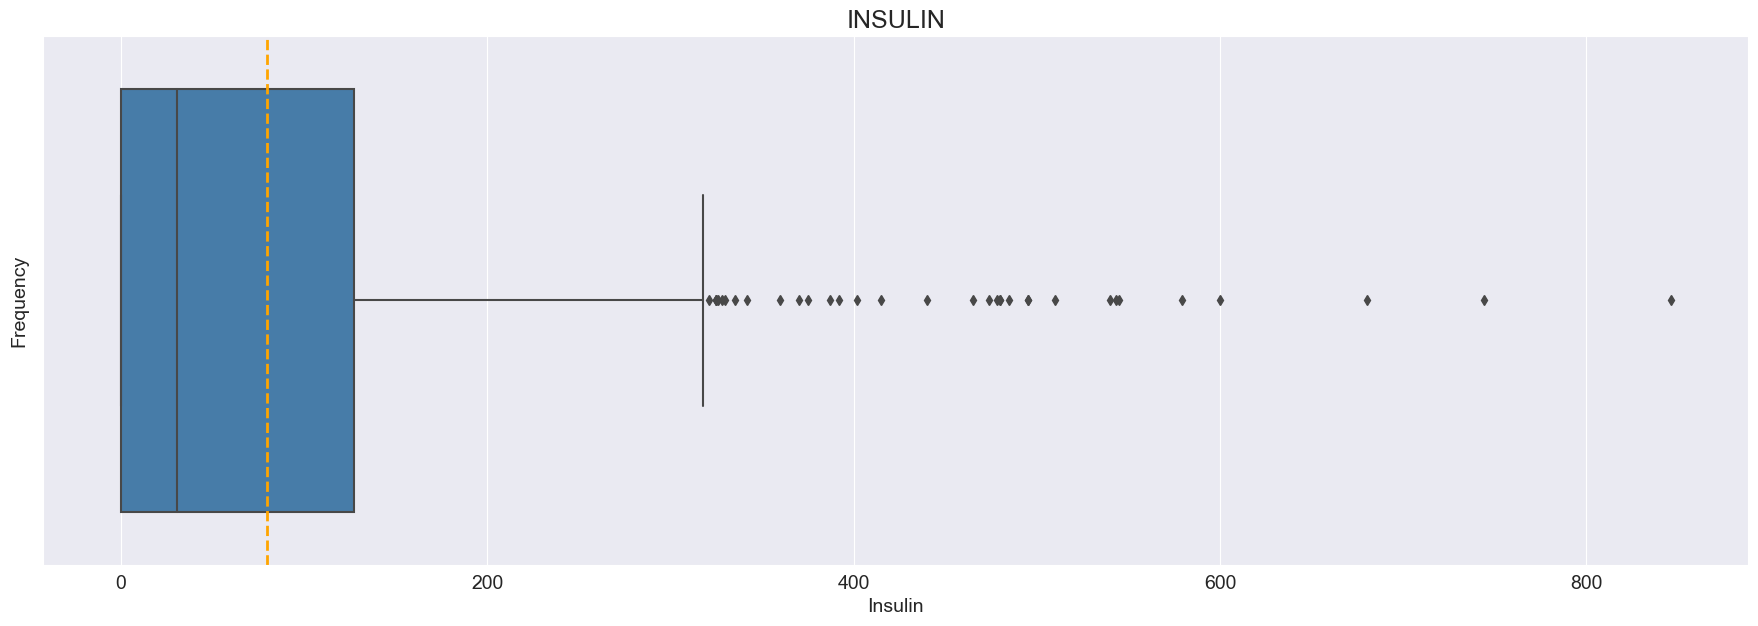

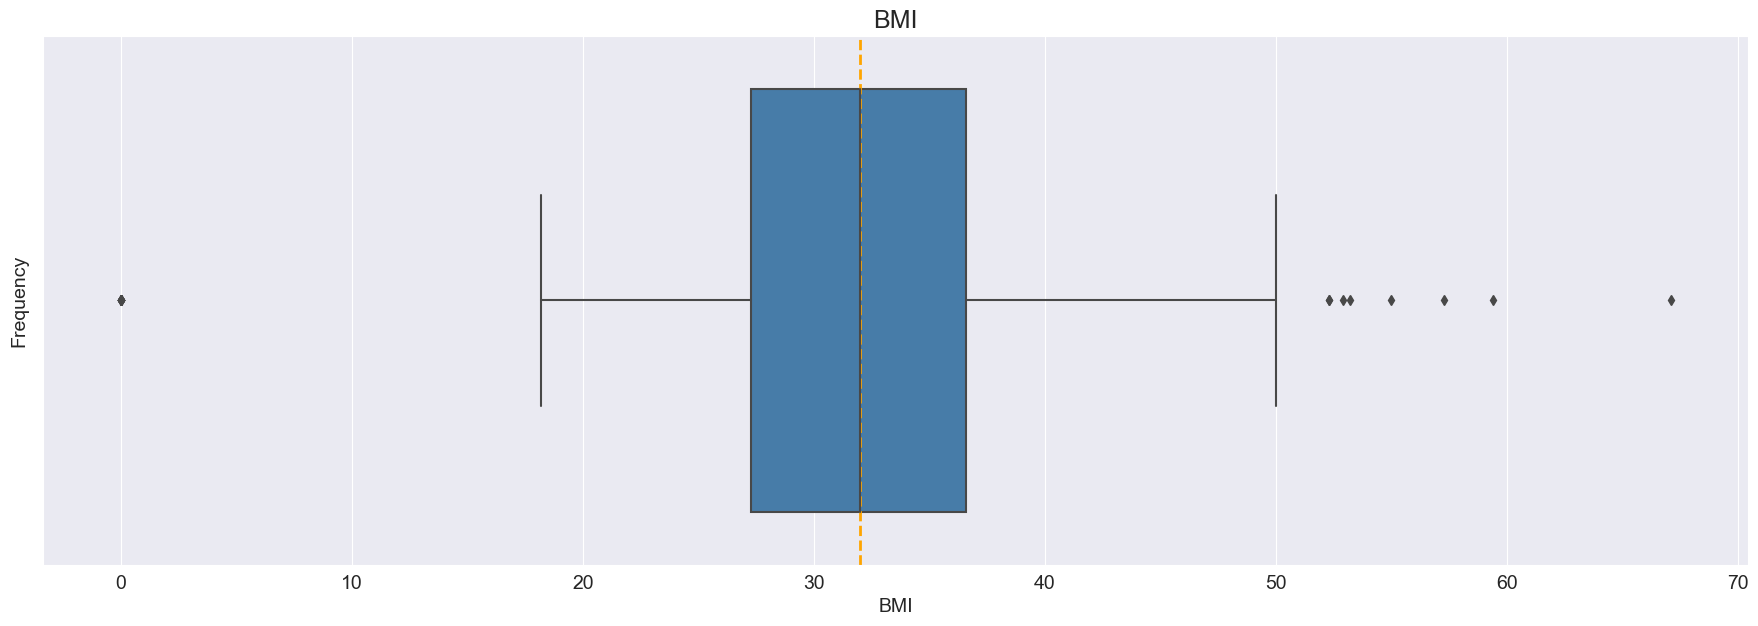

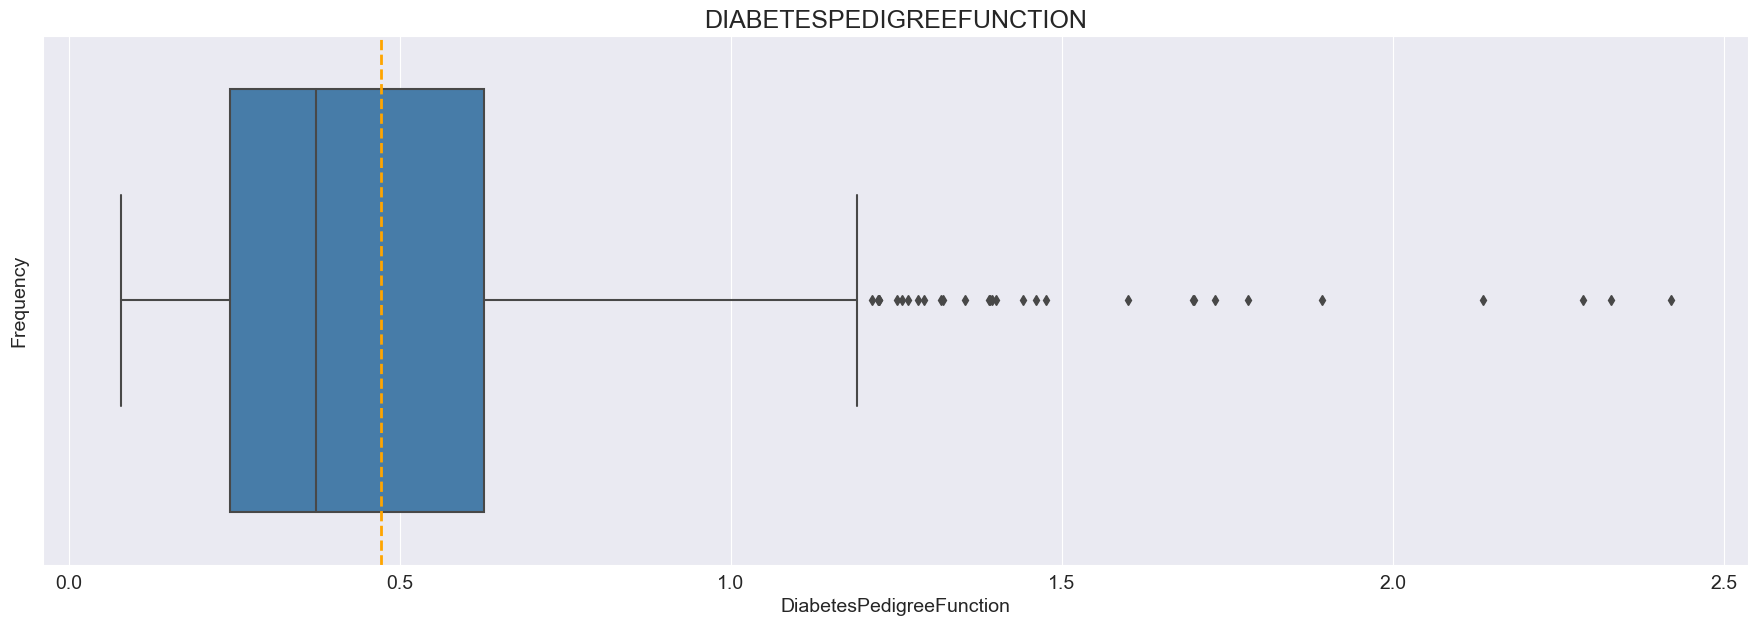

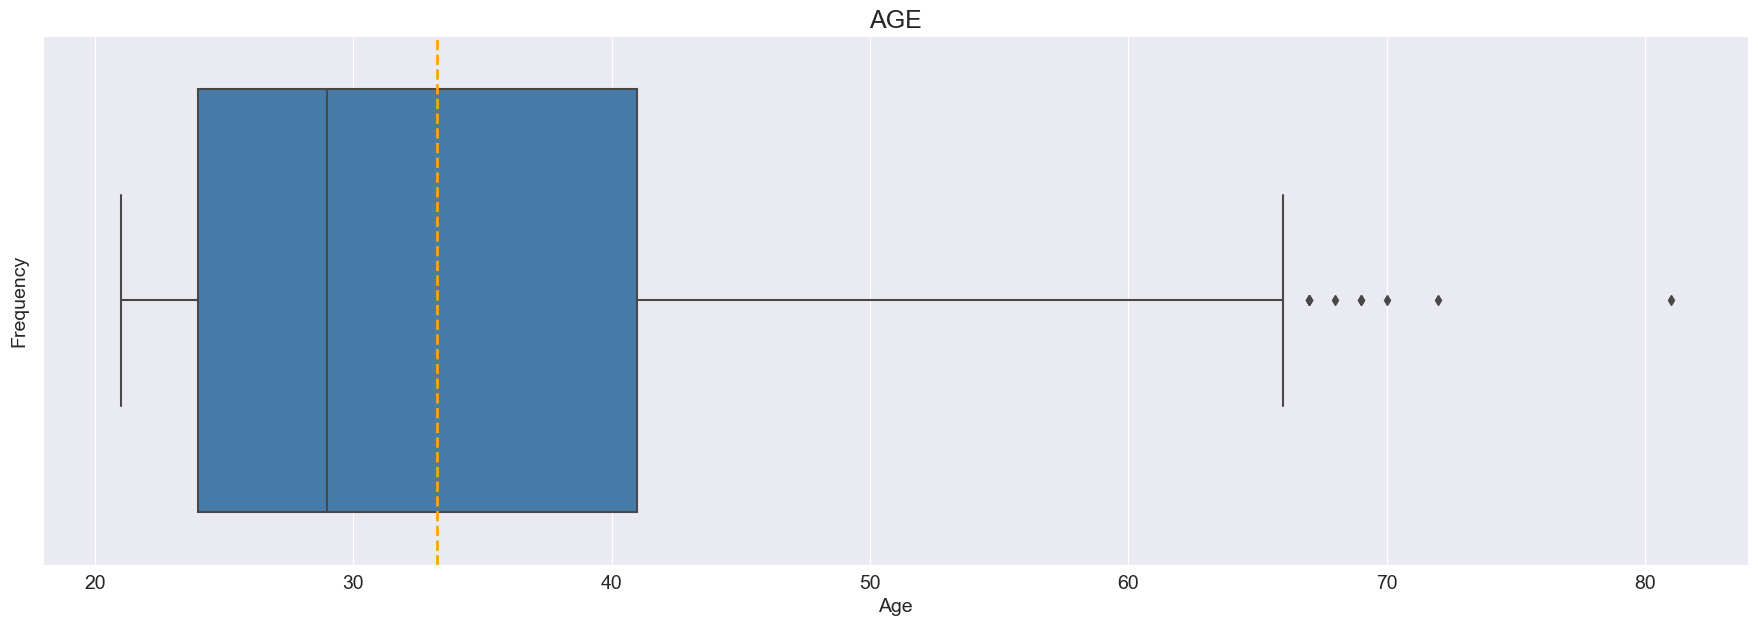

In [10]:
for col in diab.columns[:-1]:
    ax = sns.boxplot(data = diab, x = col,  color=palette[1])
    plt.axvline(diab[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
    plt.title(col.upper(), fontsize=18)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

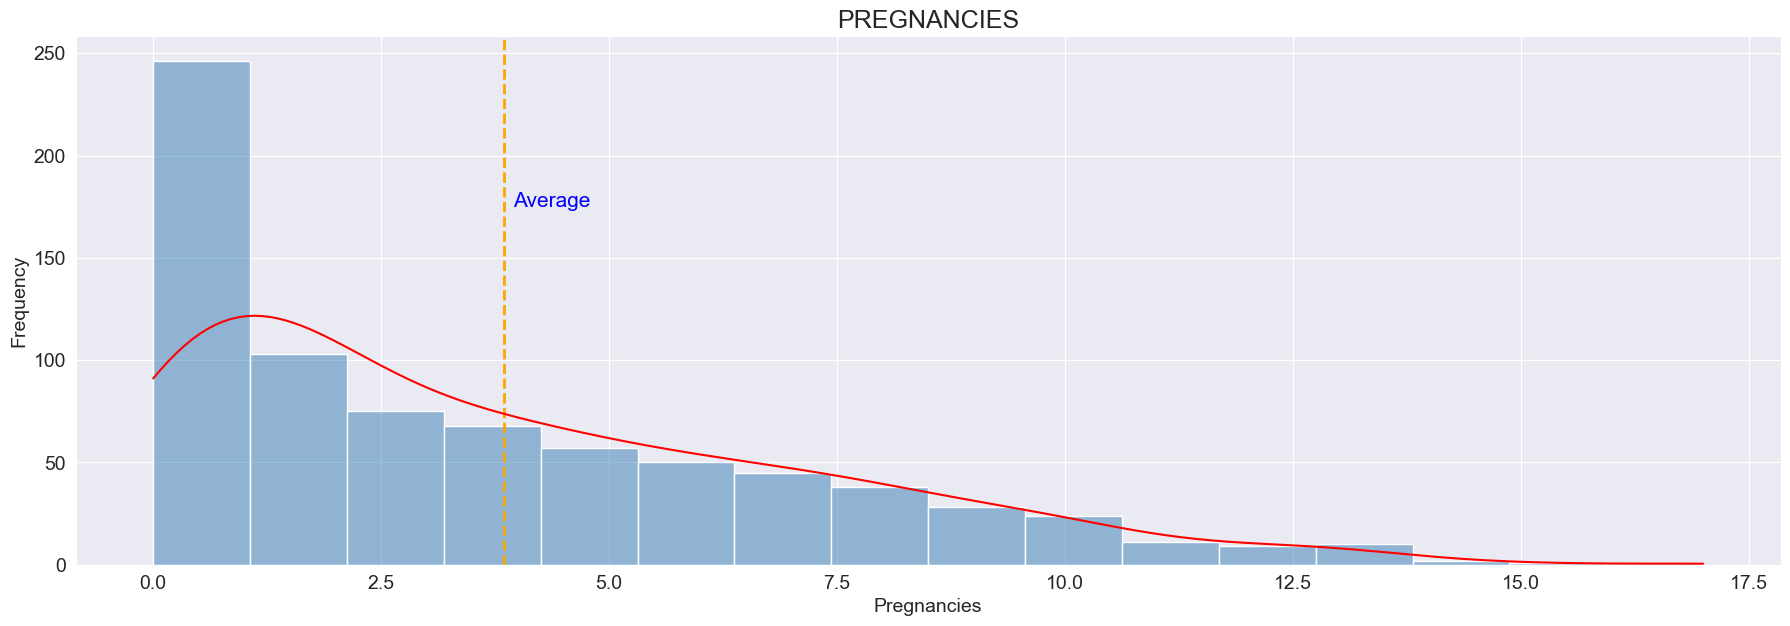

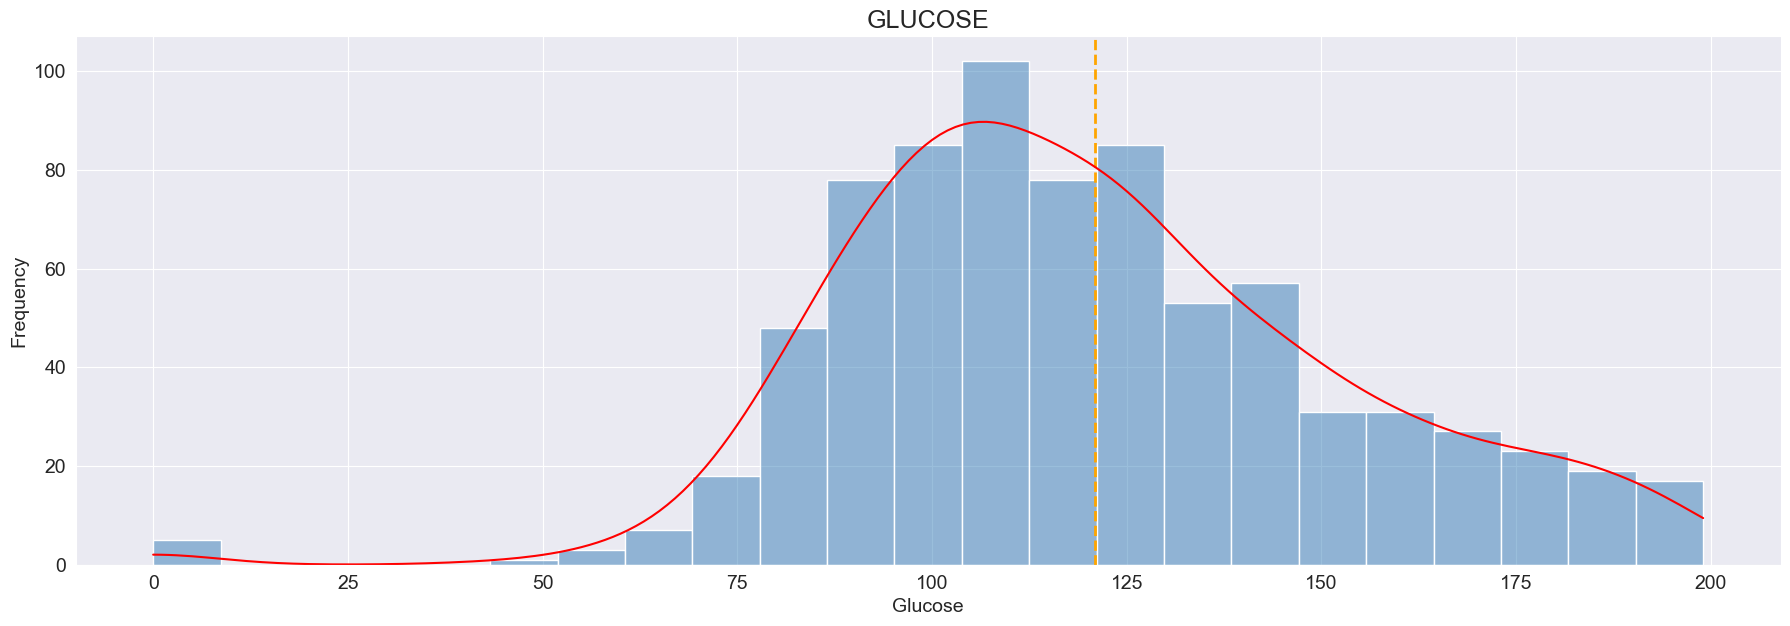

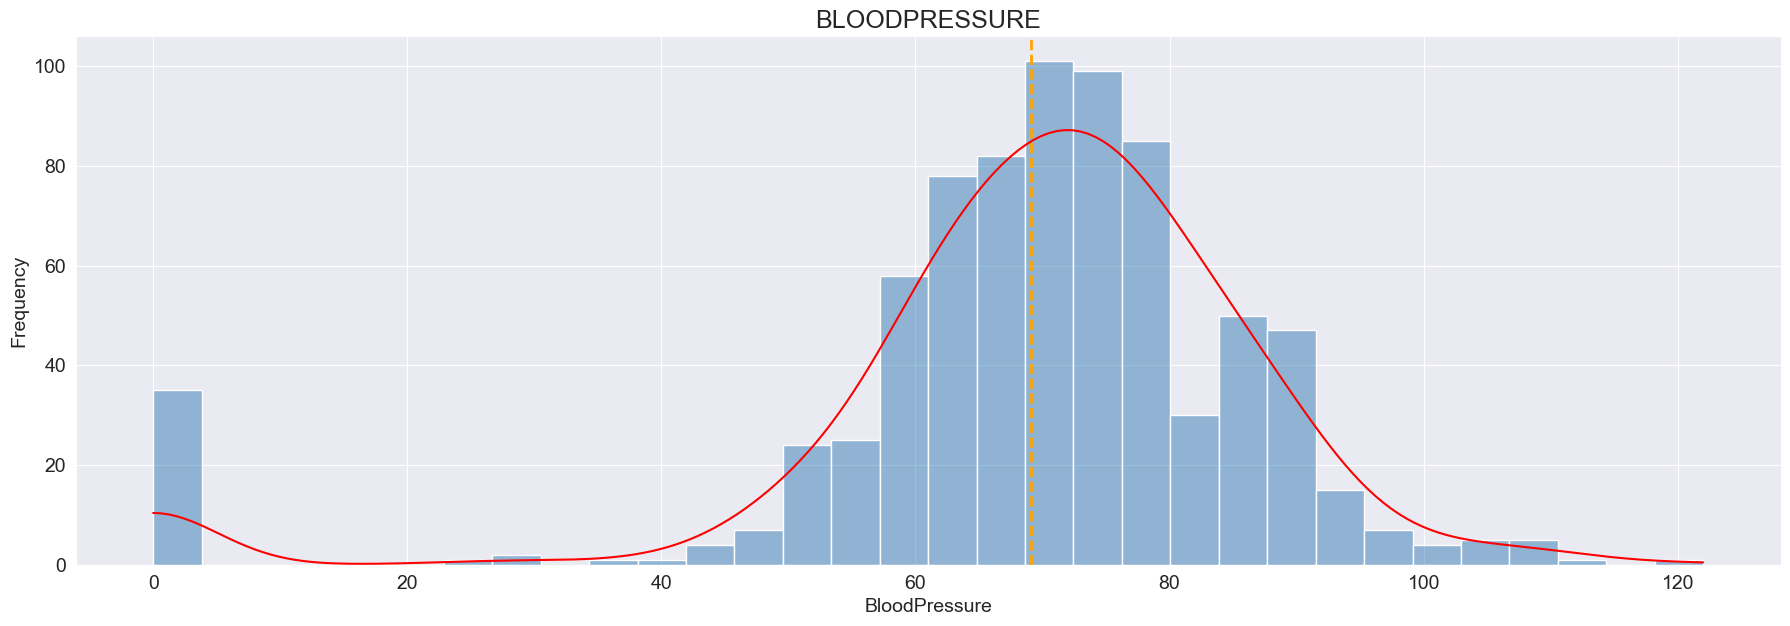

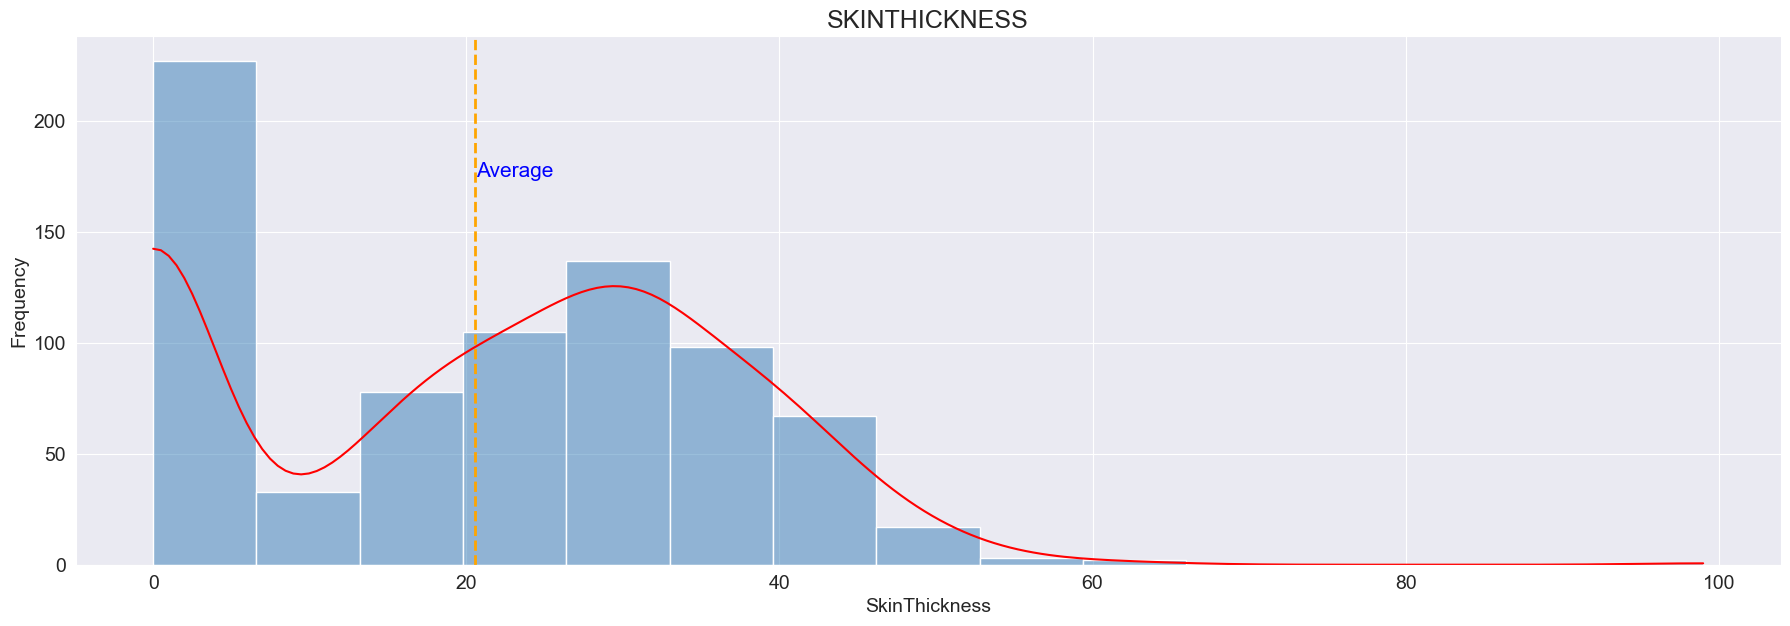

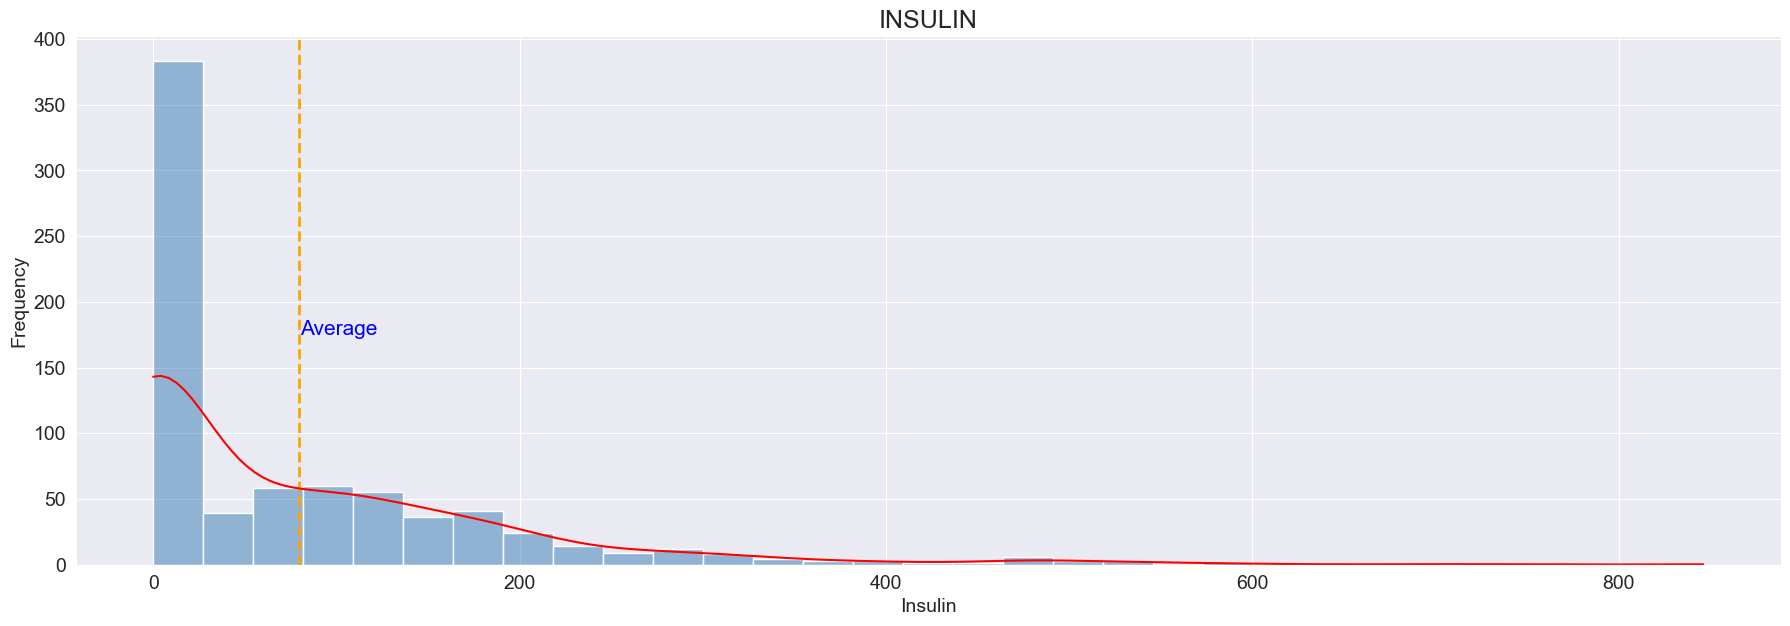

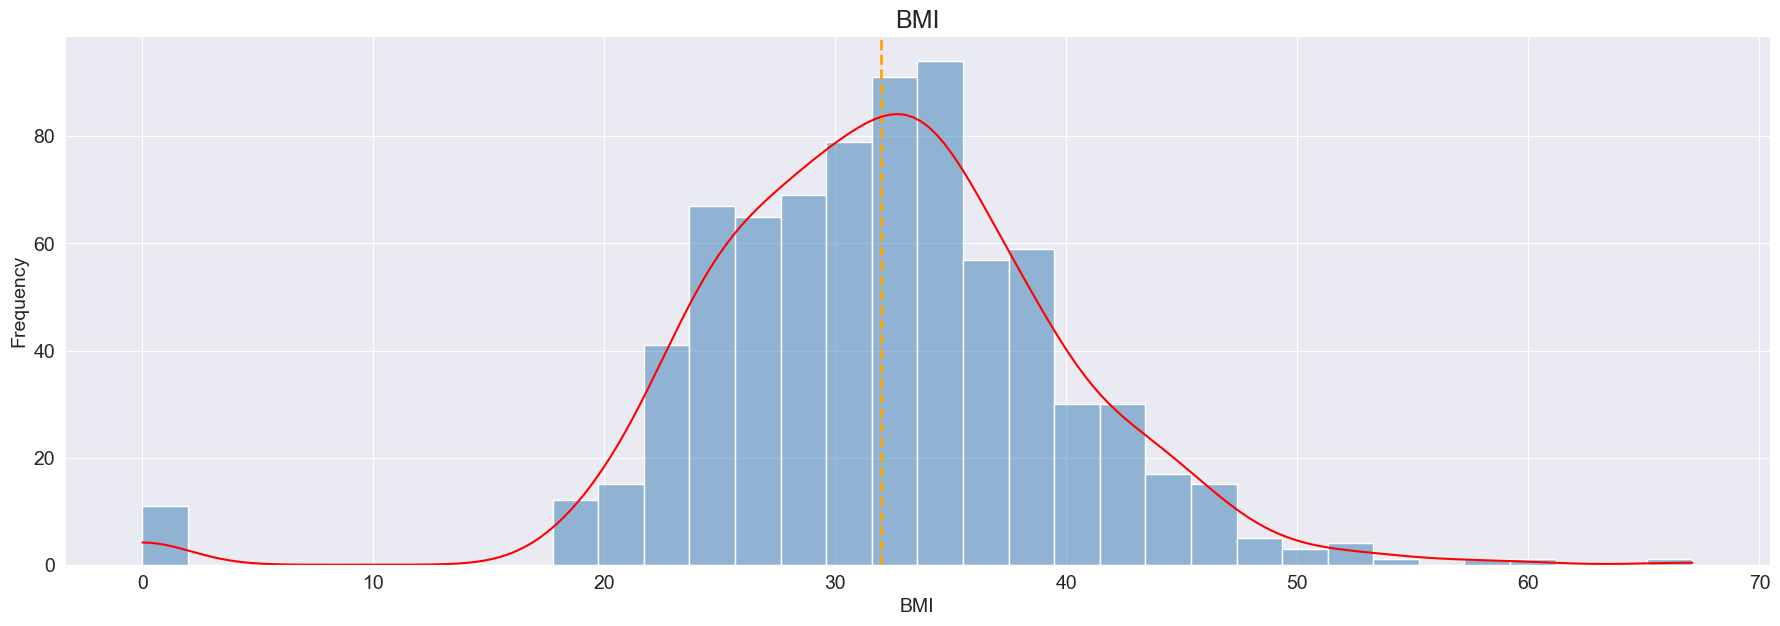

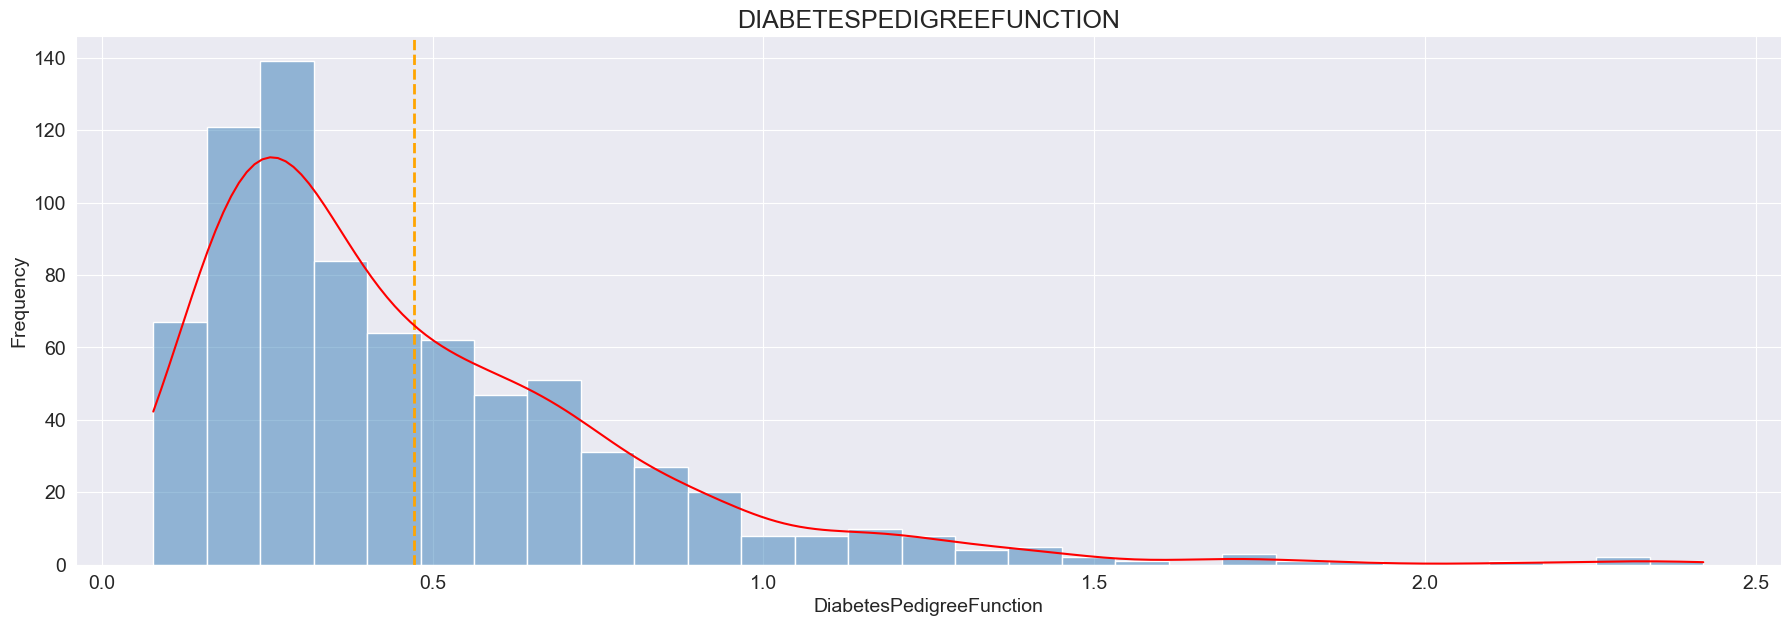

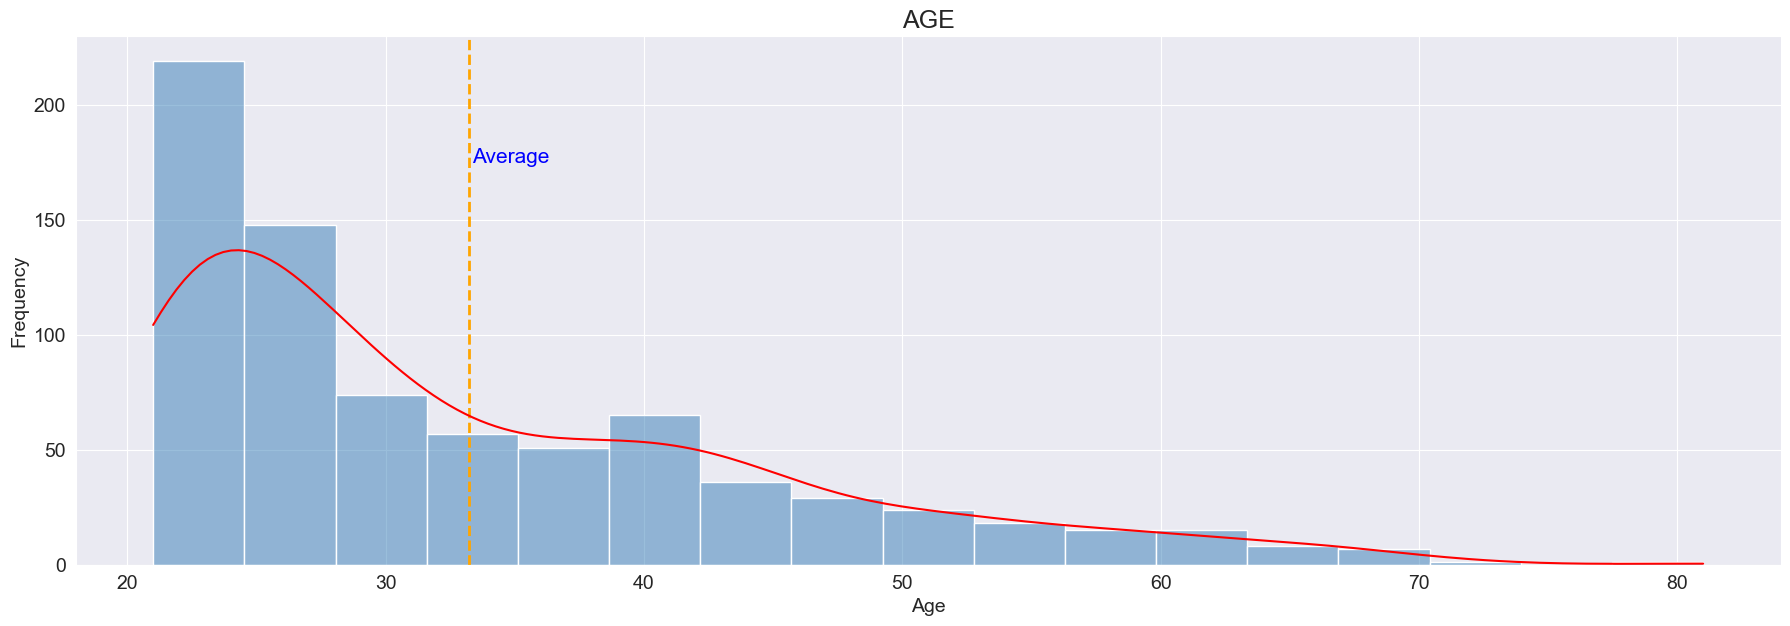

In [11]:
for col in diab.columns[:-1]:
    ax = sns.histplot(data = diab, x = col, kde = True, color=palette[1])
    ax.lines[0].set_color('red')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axvline(diab[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
    plt.annotate(f'Average', (diab[col].mean()+0.1, 175), fontsize=15, color='blue')
    plt.title(col.upper(), fontsize=18)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

<br>

<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">🧹 Data Preprocessing 🛠️</h2>
</div>


<div style="background: #FFA500; color: #ffffff; padding: 5px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> Managing Missing Values</h4>
</div>


In [12]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [13]:
diab[columns_to_replace] =diab[columns_to_replace].replace(0, np.nan)

In [14]:
diab.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
fill_with_median = ['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
fill_with_mean = ['BloodPressure', 'BMI']

In [16]:
for col in fill_with_median:
    median_value = diab[col].median()
    diab[col].fillna(median_value, inplace = True)

for col in fill_with_mean:
    mean_value = diab[col].mean()
    diab[col].fillna(mean_value, inplace = True)

<br>

<div style="background: #FFA500; color: #ffffff; padding: 5px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> Dealing with Outliers</h4>
</div>


In [17]:
# Calculate IQR, lower bound, and upper bound for all columns in the dataset
Q1 = diab.quantile(0.25)
Q3 = diab.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = pd.Series(False, index=diab.index)
for col in diab.columns:
    is_outlier = (diab[col] < lower_bound[col]) | (diab[col] > upper_bound[col])
    outlier_mask |= is_outlier

diab_no_outliers = diab[~outlier_mask]

In [18]:
diab_no_outliers.skew()

Pregnancies                 0.511869
Glucose                     0.539863
BloodPressure               0.196540
SkinThickness              -0.110164
Insulin                    -0.324861
BMI                         0.424330
DiabetesPedigreeFunction    1.189008
Age                         0.849856
Outcome                     0.549622
dtype: float64

<br>

<div style="background: #FFA500; color: #ffffff; padding: 5px 10px; font-family: 'Verdana', sans-serif; border-radius: 3px; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h4 style="font-size: 18px; font-weight: bold; margin: 0; text-transform: uppercase; letter-spacing: 1px;"> Post-Preprocessing Column Distributions</h4>
</div>


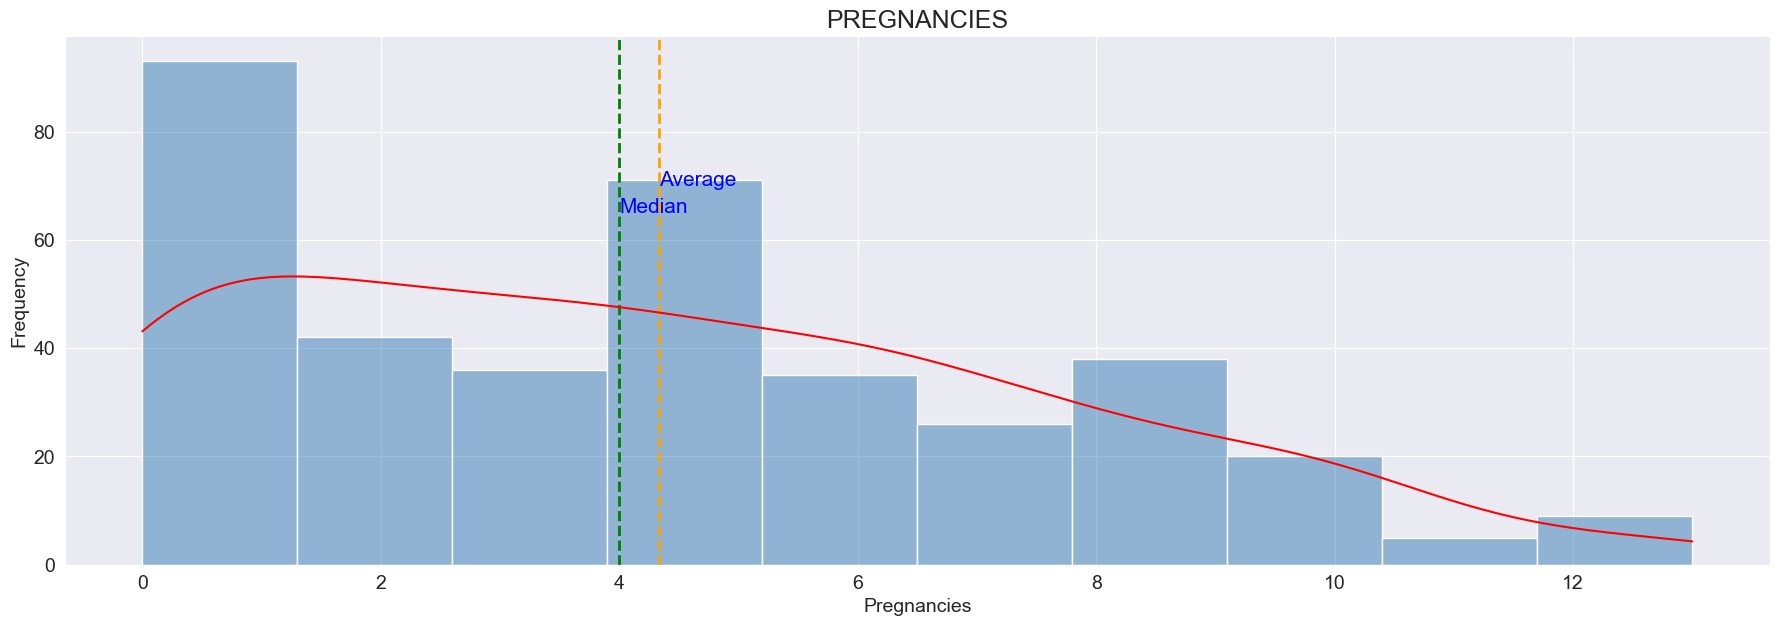

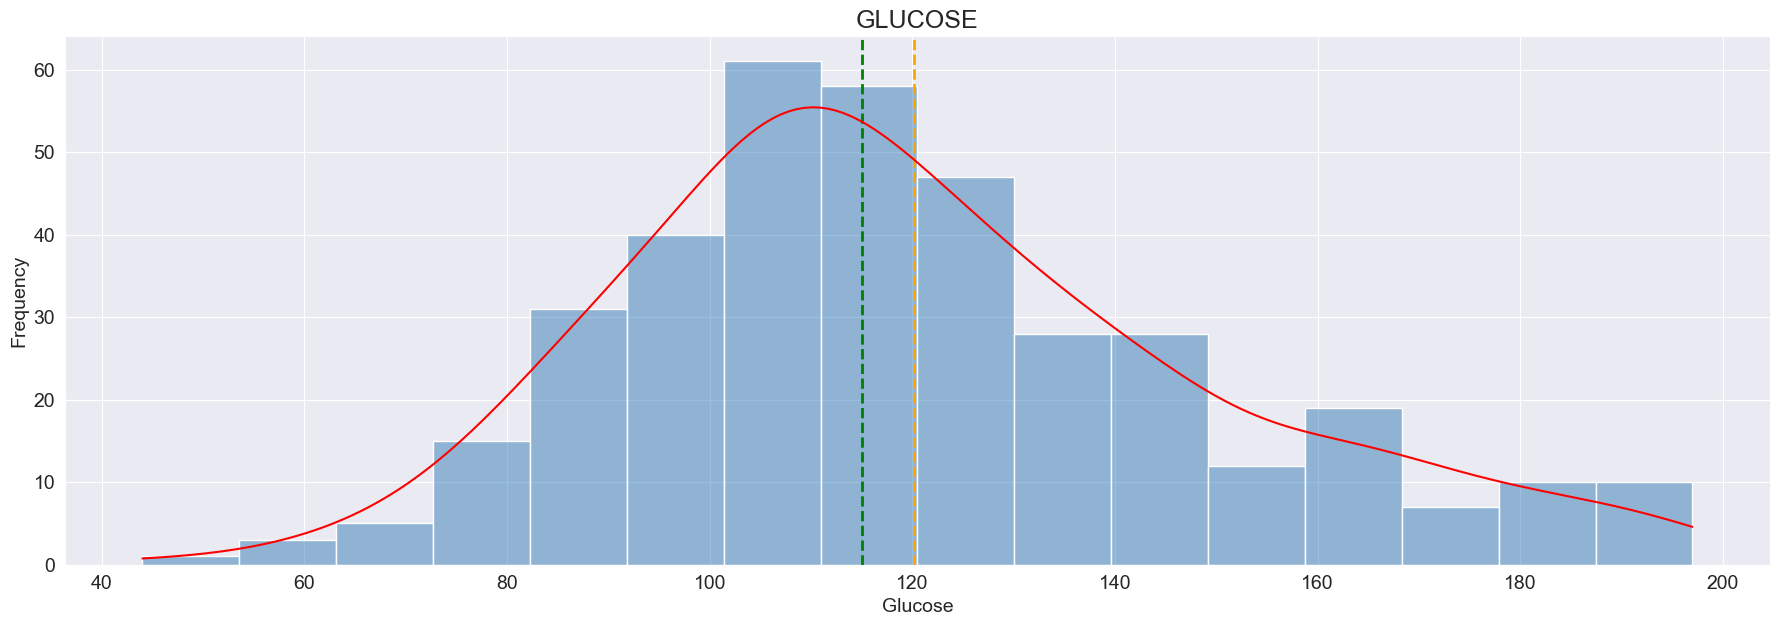

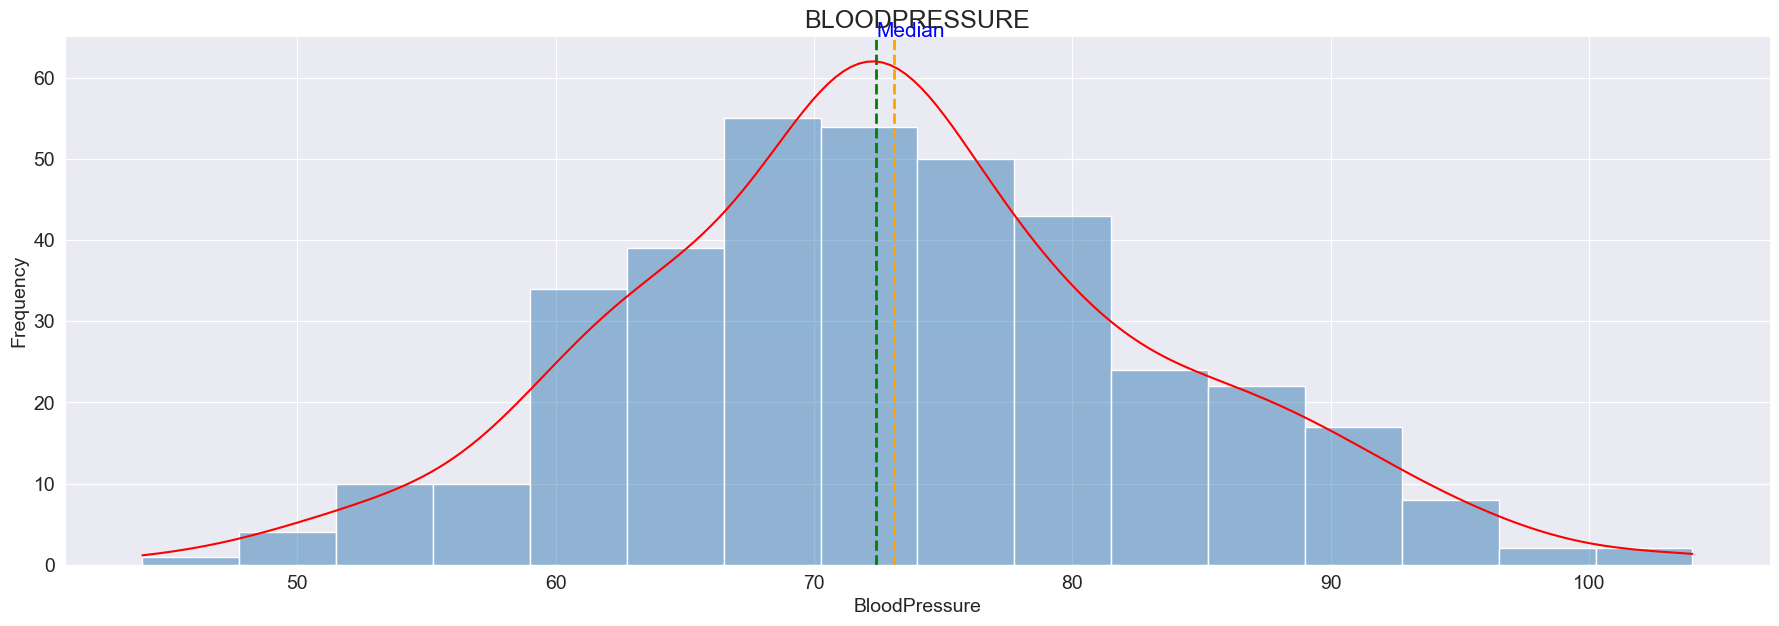

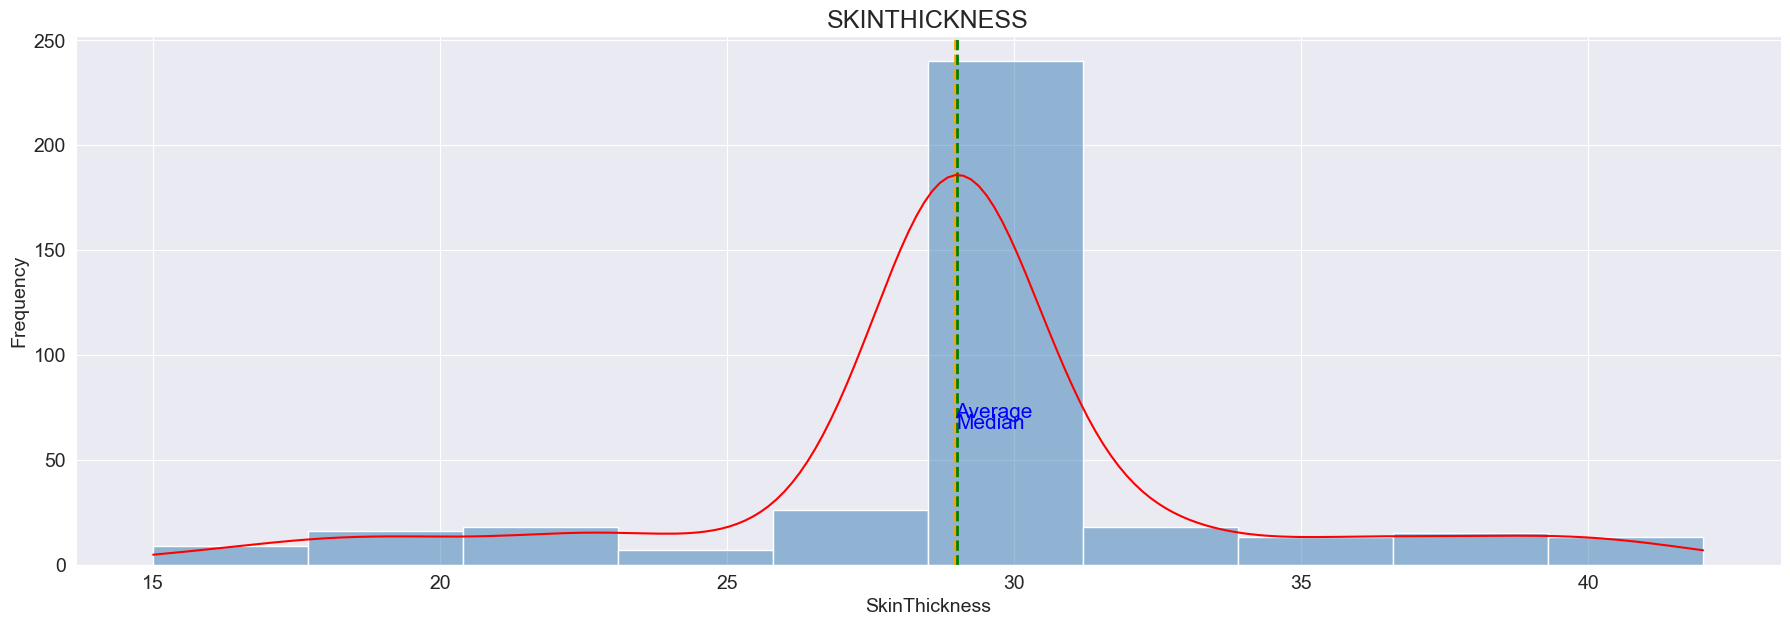

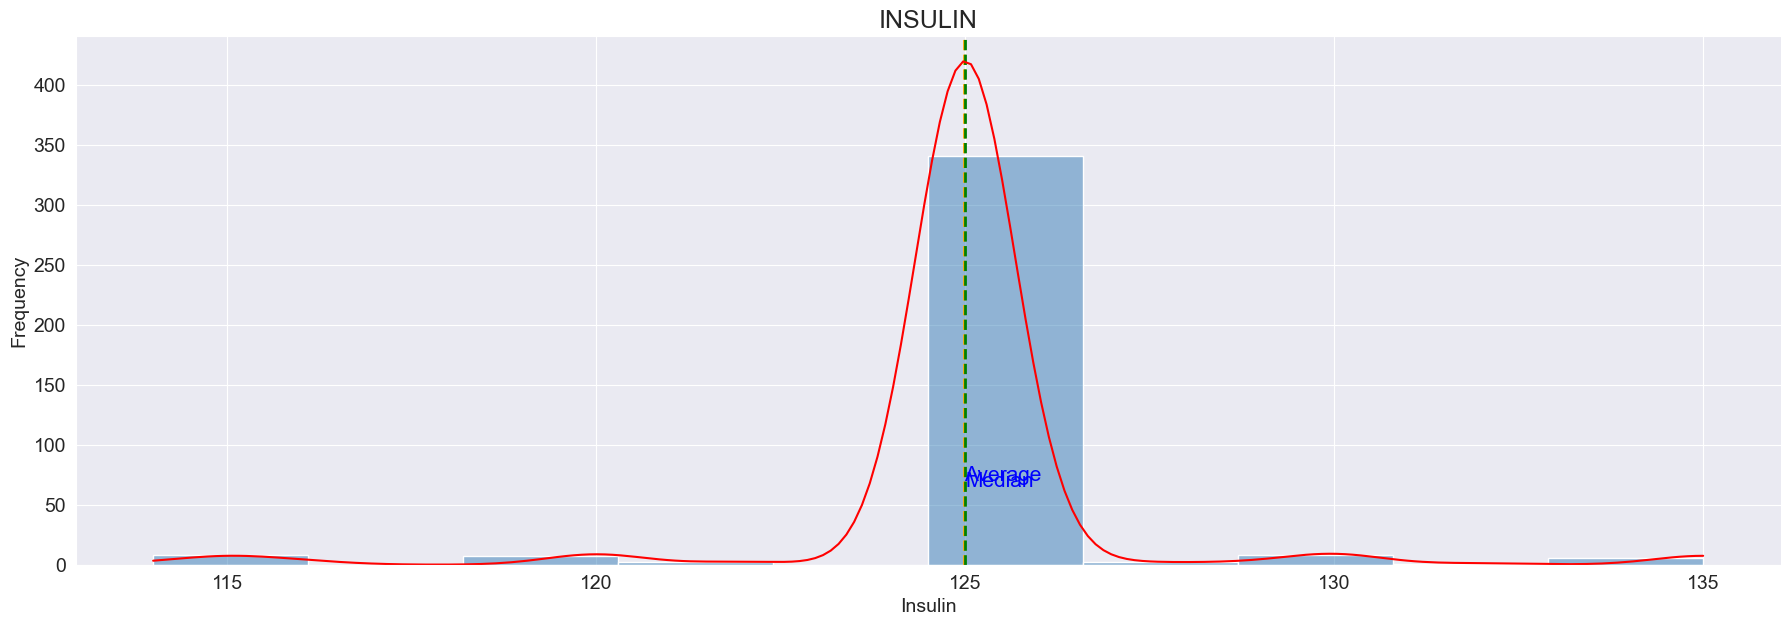

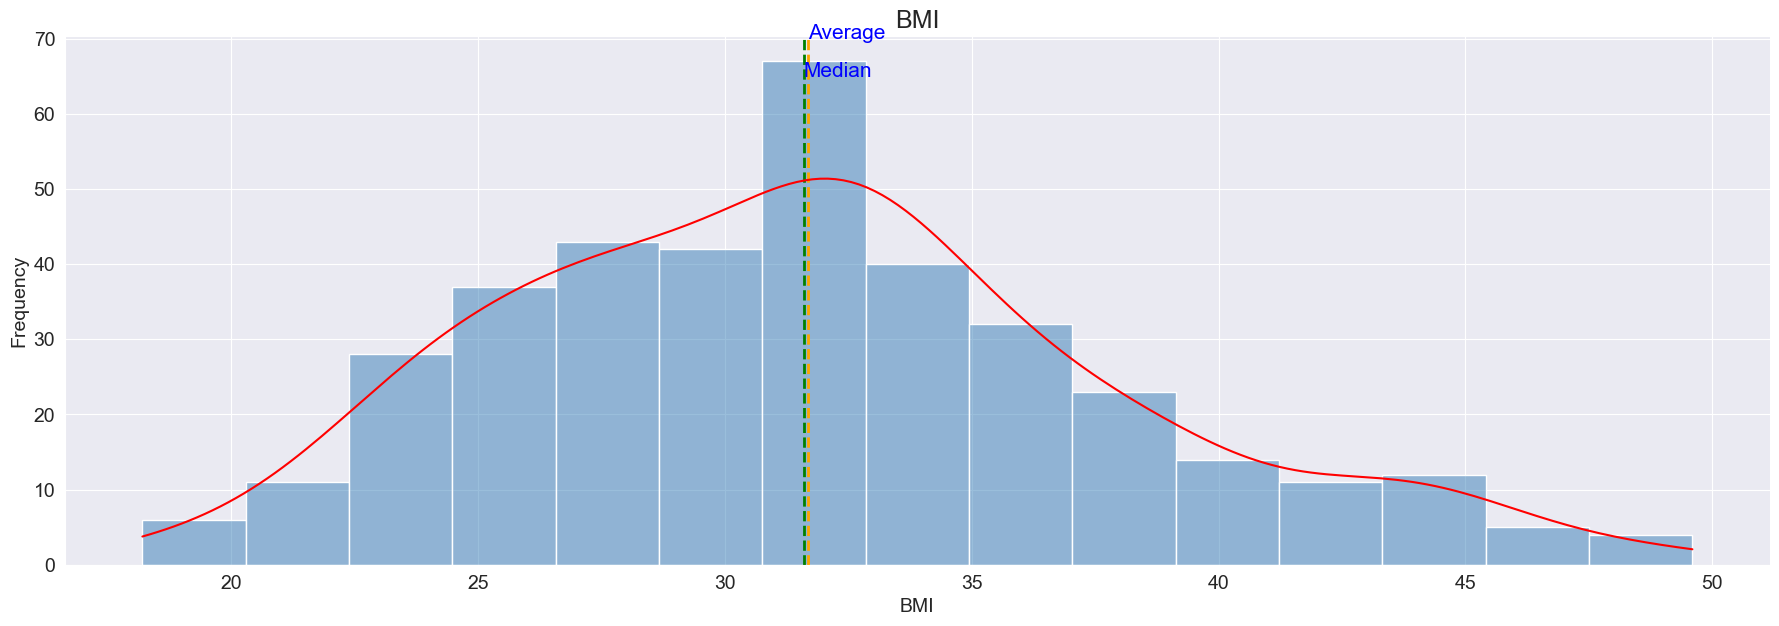

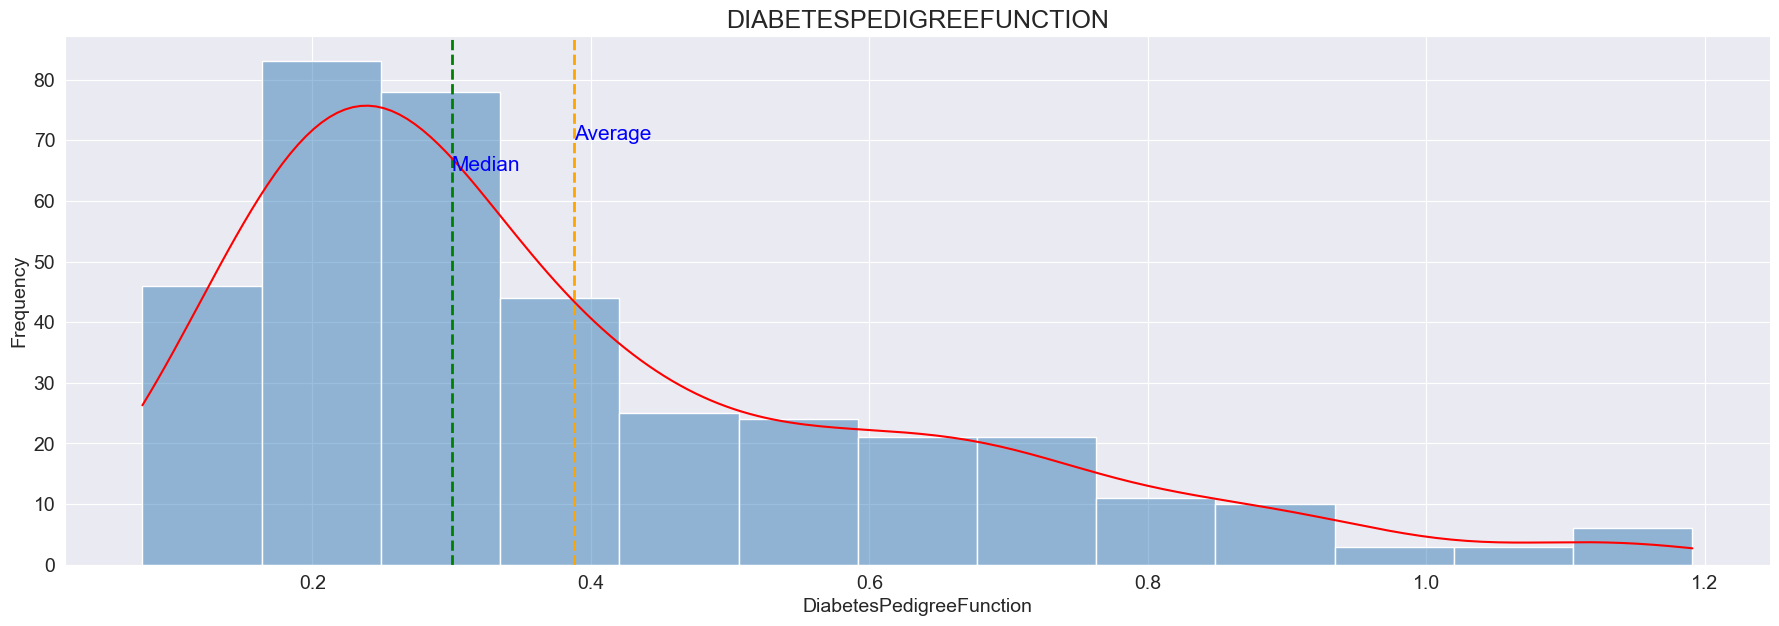

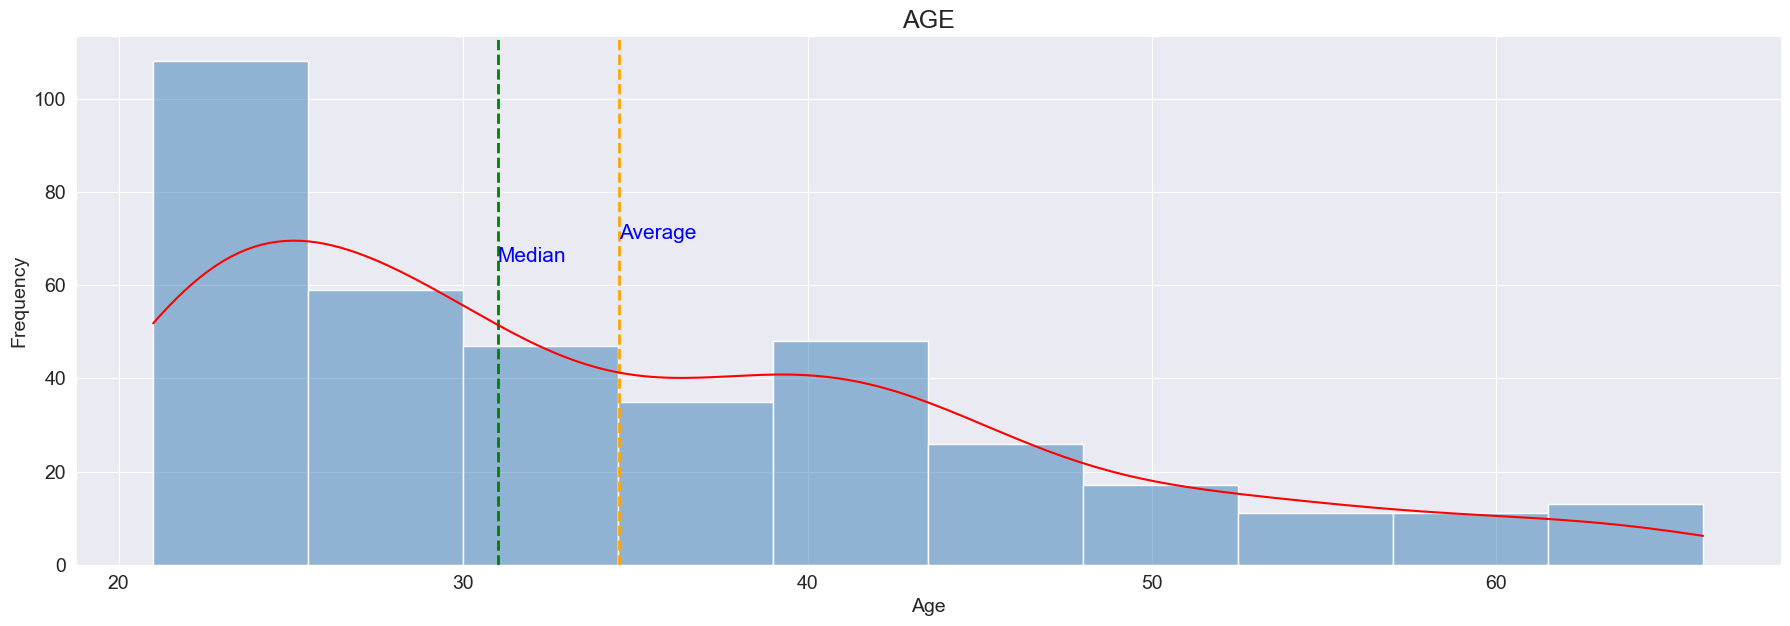

In [19]:
for col in diab_no_outliers.columns[:-1]:
    ax = sns.histplot(data = diab_no_outliers, x = col, kde = True, color=palette[1])
    ax.lines[0].set_color('red')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axvline(diab_no_outliers[col].mean(), linestyle='--', lw=2, zorder=1, color='orange')
    plt.annotate(f'Average', (diab_no_outliers[col].mean(), 70), fontsize=15, color='blue')
    plt.axvline(diab_no_outliers[col].median(), linestyle='--', lw=2, zorder=1, color='green')
    plt.annotate(f'Median', (diab_no_outliers[col].median(), 65), fontsize=15, color='blue')
    plt.title(col.upper(), fontsize=18)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

In [20]:
diab.shape

(768, 9)

In [21]:
diab_no_outliers.shape

(375, 9)

<br>

<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">🏗️Model Building & Training 🤖</h2>
</div>


In [22]:
X = diab_no_outliers.drop('Outcome', axis=1) 
y = diab_no_outliers['Outcome'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and fit a StandardScaler to the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [24]:
clf = RandomForestClassifier(random_state=21) 
clf.fit(X_train_scaled, y_train)
y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

<br>

<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; margin: 0;">📊 Model Assessment and Metrics 📈</h2>
</div>


In [25]:
# Evaluate the model as before
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_test, y_pred_test)
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)

# Print the evaluation metrics
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print('-' * 30)
print(f"Accuracy Test: {accuracy_test:.2f}")
print(f"Accuracy Train: {accuracy_train:.2f}")
print('-' * 30)
print(f" Test Confusion Matrix: \n {conf_matrix_test}")
print('-' * 30)
print(f" Train Confusion Matrix: \n {conf_matrix_train}")
print('-' * 30)
print(f"Classification Report: \n {class_report}")

Cross-Validation Scores: [0.68333333 0.8        0.75       0.66666667 0.73333333]
Mean Accuracy: 0.7266666666666667
------------------------------
Accuracy Test: 0.77
Accuracy Train: 1.00
------------------------------
 Test Confusion Matrix: 
 [[40  6]
 [11 18]]
------------------------------
 Train Confusion Matrix: 
 [[191   0]
 [  0 109]]
------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        46
           1       0.75      0.62      0.68        29

    accuracy                           0.77        75
   macro avg       0.77      0.75      0.75        75
weighted avg       0.77      0.77      0.77        75



<div style="background: linear-gradient(45deg, #00BFFF, #007BFF); color: #ffffff; padding: 10px; font-family: 'Verdana', sans-serif; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0, 0, 0, 0.3);">
    <h2 style="font-size: 24px; font-weight: bold; text-align:center; margin: 0;"> Thank You! 😊</h2>
</div>
